In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.descriptivestats import *
from statsmodels.stats.weightstats import *
import itertools
import matplotlib.pylab as plt

In [3]:
data = pd.read_csv('weight.txt', header=0, sep='\t')
data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


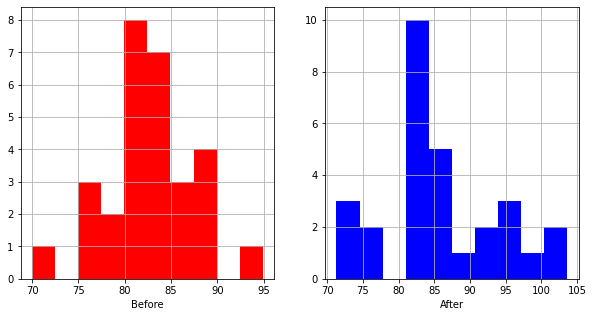

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.grid()
plt.hist(data.Before, color='r')
plt.xlabel('Before')
plt.subplot(1,2,2)
plt.grid()
plt.hist(data.After, color='b')
plt.xlabel('After')
plt.show()

In [6]:
print(zconfint(data.Before))
print('----')
print('After:', zconfint(data.After))

(80.92610749911721, 84.45320284571041)
----
After: (82.6568174981233, 88.7362859501525)


(array([ 2.,  3.,  5., 10.,  2.,  1.,  1.,  2.,  2.,  1.]),
 array([-9.1, -6.1, -3.1, -0.1,  2.9,  5.9,  8.9, 11.9, 14.9, 17.9, 20.9]),
 <BarContainer object of 10 artists>)

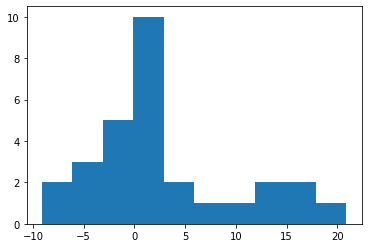

In [7]:
plt.hist(data.After - data.Before)

In [10]:
#   Критерий знаков
sign_test(data.After - data.Before)[1]

0.26493089646101

In [8]:
#   Критерий знаков Вилкосона
stats.wilcoxon(data.After - data.Before)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [11]:
stats.wilcoxon(data.After, data.Before)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

In [36]:
#   Перестановочный критерий
#   H0 = E(X1 - X2) = 0
#   H1 = E(X1 - X2 ) <=> 0
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(map(lambda x: x - mean, sample))
    return t_stat

def permutation_zero_distr_1sample(sample, mean, max_permutations=None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size=(max_permutations, len(sample))) - 1])
    else:
        signs_array = itertools.product([-1,1], repeat=len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

def permutation_test(sample, mean, alternative='two-sided', max_permutations=None):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError('Unknown alternative')
    t_stat = permutation_t_stat_1sample(sample, mean)
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations=max_permutations)
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0 for x in zero_distr]) / len(zero_distr)
    if alternative == 'less':
        return sum([1. if x<= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    if alternative == 'greater':
        return sum([1. if x>= t_stat else 0. for x in zero_distr]) / len(zero_distr)

(array([  28.,  217.,  772., 1610., 2355., 2403., 1620.,  764.,  209.,
          22.]),
 array([-138.2 , -110.66,  -83.12,  -55.58,  -28.04,   -0.5 ,   27.04,
          54.58,   82.12,  109.66,  137.2 ]),
 <BarContainer object of 10 artists>)

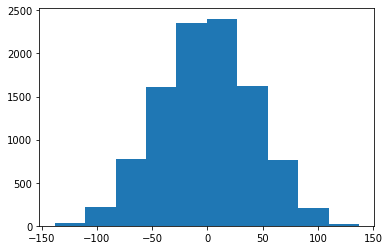

In [35]:
plt.hist(permutation_zero_distr_1sample(data.After - data.Before, 0., max_permutations=10000))

In [44]:
permutation_test(data.After - data.Before, .0, max_permutations=10000)

0.0349

In [42]:
permutation_test(data.After - data.Before, .0, max_permutations=50000)

0.0347